# Bitcoin Mining: The Heart of the Blockchain

## What is Mining?

Imagine a global contest where participants solve complex puzzles. The first to solve gets a prize and the right to add a new page to a special book. This is Bitcoin mining in a nutshell!

- **Miners** are the contestants
- **The puzzle** is a cryptographic challenge
- **The prize** is newly created bitcoins and transaction fees
- **The book** is the blockchain

## The Mining Process

1. **Collect unconfirmed transactions**: Miners gather recent Bitcoin transactions that haven't been recorded in the blockchain yet.

2. **Create a block**: Miners bundle these transactions into a "block" - like filling a page in our book.

3. **Solve the puzzle**: Miners compete to find a special number (nonce) that, when combined with the block data, produces a hash starting with a certain number of zeros.

4. **Seal the block**: The winning miner adds their block to the blockchain and receives the mining reward.

Let's see how this works in code:

## Understanding the Mining Process in Code

Our code will simulate a simplified version of Bitcoin mining. Here's what it will demonstrate:

1. How a block is created and its hash is calculated
2. The mining process of finding a valid hash
3. How increasing difficulty affects mining time and attempts

Let's break it down:

In [1]:
import hashlib
import time
import matplotlib.pyplot as plt

class Block:
    def __init__(self, transactions, previous_hash):
        self.transactions = transactions
        self.previous_hash = previous_hash
        self.nonce = 0
        self.timestamp = time.time()
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_content = f"{self.previous_hash}{self.timestamp}{self.nonce}{''.join(self.transactions)}"
        return hashlib.sha256(block_content.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4
        self.pending_transactions = []
        self.mining_reward = 6.25  # Bitcoin reward as of 2023

    def create_genesis_block(self):
        return Block(["Genesis Block"], "0" * 64)

    def get_latest_block(self):
        return self.chain[-1]

    def mine_block(self, miner_address):
        start_time = time.time()
        block = Block(self.pending_transactions, self.get_latest_block().hash)
        
        print("Mining in progress...")
        while block.hash[:self.difficulty] != "0" * self.difficulty:
            block.nonce += 1
            block.hash = block.calculate_hash()
        
        end_time = time.time()
        mining_time = end_time - start_time
        
        print(f"Block mined! Time taken: {mining_time:.2f} seconds")
        print(f"Block hash: {block.hash}")
        print(f"Nonce: {block.nonce}")
        
        self.chain.append(block)
        self.pending_transactions = [f"Mining Reward: {self.mining_reward} BTC to {miner_address}"]
        
        return mining_time, block.nonce

### Key Parts of the Code Explained

1. **Block Class**: Represents a single block in the blockchain.
   - `calculate_hash()`: Creates a unique identifier for the block using its contents.

2. **Blockchain Class**: Manages the entire chain of blocks.
   - `mine_block()`: Simulates the mining process, trying different nonces until a valid hash is found.

3. **Difficulty**: Represented by the number of leading zeros required in the block hash.
   - Higher difficulty means more zeros, making it harder to find a valid hash.

4. **Nonce**: A number that miners change to get different hashes until they find one that meets the difficulty requirement.

This simplified model helps us understand the core concepts of Bitcoin mining without getting lost in the complexities of the actual Bitcoin protocol.

## Visualizing Mining Difficulty

Now, let's see how changing the mining difficulty affects the mining process. We'll mine blocks at different difficulty levels and plot the results.


Mining in progress...
Block mined! Time taken: 0.00 seconds
Block hash: 00d896e66b5e3a9598a7bd227363d9603c334ffb4bfd02571da4cf7aa53fcd6b
Nonce: 202
Mining in progress...
Block mined! Time taken: 0.08 seconds
Block hash: 0002a522238c12ecd69ff13418a0857840121e06f44419fcd7b143f2bd68dbc5
Nonce: 7563
Mining in progress...
Block mined! Time taken: 0.05 seconds
Block hash: 00002aadc227077aa05cbb9ef35a831c4b211f8dc32924c37ccec9c89edd8673
Nonce: 15426
Mining in progress...


Block mined! Time taken: 0.52 seconds
Block hash: 00000cb78e161d97acc33300805721a8b8121c920ec96898f8fbd435840d2efb
Nonce: 161591


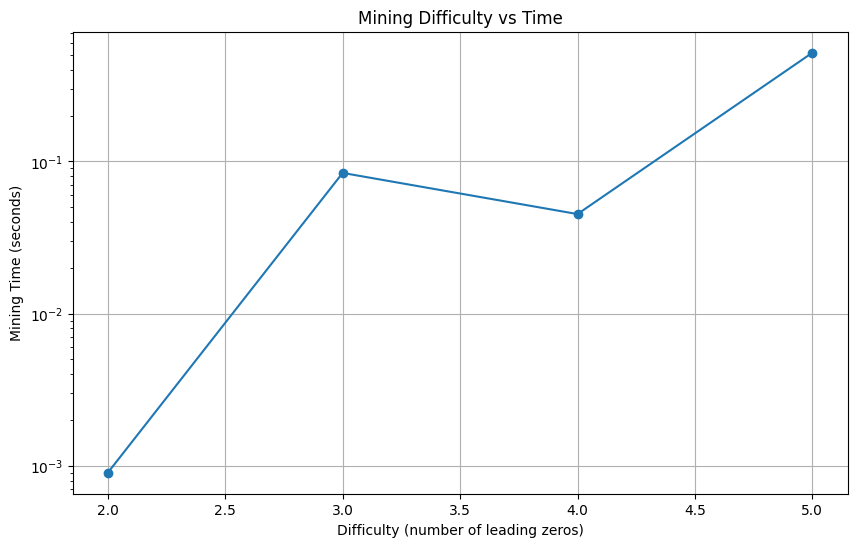

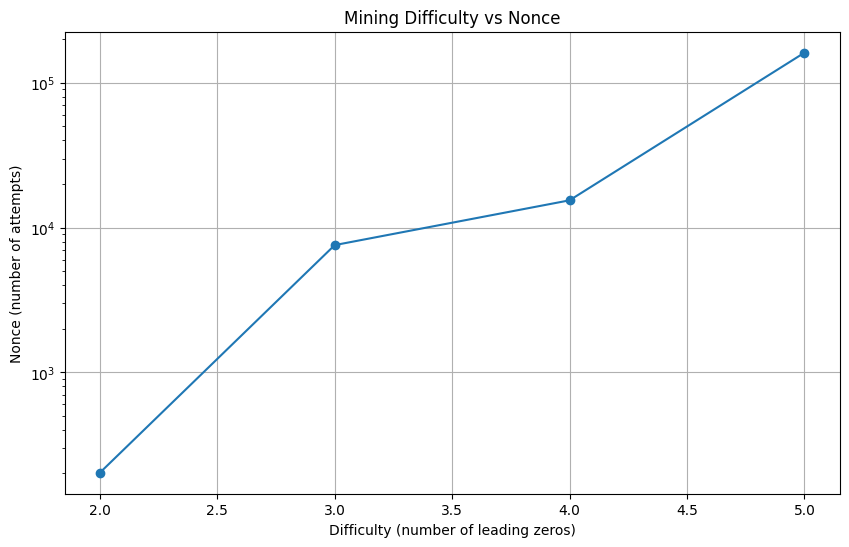

In [2]:
blockchain = Blockchain()

# Add some transactions
blockchain.pending_transactions = [
    "Alice sends 1 BTC to Bob",
    "Charlie sends 0.5 BTC to David"
]

# Mine blocks with increasing difficulty
difficulties = [2, 3, 4, 5]
mining_times = []
nonces = []

for diff in difficulties:
    blockchain.difficulty = diff
    time_taken, nonce = blockchain.mine_block("miner_address")
    mining_times.append(time_taken)
    nonces.append(nonce)
    
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(difficulties, mining_times, marker='o')
plt.title("Mining Difficulty vs Time")
plt.xlabel("Difficulty (number of leading zeros)")
plt.ylabel("Mining Time (seconds)")
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(difficulties, nonces, marker='o')
plt.title("Mining Difficulty vs Nonce")
plt.xlabel("Difficulty (number of leading zeros)")
plt.ylabel("Nonce (number of attempts)")
plt.yscale('log')
plt.grid(True)
plt.show()

### Understanding the Graphs

1. **Mining Difficulty vs Time Graph**:
   - X-axis: Difficulty (number of leading zeros required)
   - Y-axis: Time taken to mine a block (in seconds)
   - What it shows: As difficulty increases, mining time grows exponentially
   - Why it's important: Demonstrates how Bitcoin can adjust difficulty to maintain consistent block times

2. **Mining Difficulty vs Nonce Graph**:
   - X-axis: Difficulty (number of leading zeros required)
   - Y-axis: Nonce (number of attempts to find a valid hash)
   - What it shows: Higher difficulty requires exponentially more attempts to find a valid hash
   - Why it's important: Illustrates the increasing computational work required as Bitcoin's network grows

These visualizations help us understand why mining becomes more challenging over time and how it relates to the security of the Bitcoin network.

## Anatomy of a Bitcoin Block

A Bitcoin block is like a digital container that holds important information. Here's a detailed look at its structure:

┌──────────────────────────────────────────────────────────┐
│                        Block Header                      │
├──────────────────────────────────────────────────────────┤
│ Version: 0x20000000                                      │
│ Previous Block Hash: 0000000000000000000769b...          │
│ Merkle Root: 4a5e1e4b...                                 │
│ Timestamp: 2023-10-16 12:34:56                           │
│ Difficulty Target: 0x1b0404cb                            │
│ Nonce: 2083236893                                        │
├──────────────────────────────────────────────────────────┤
│                        Transactions                      │
├──────────────────────────────────────────────────────────┤
│ Transaction 1: Alice sends 1 BTC to Bob                  │
│ Transaction 2: Charlie sends 0.5 BTC to David            │
│ Transaction 3: Eve sends 0.2 BTC to Frank                │
│ ...                                                      │
└──────────────────────────────────────────────────────────┘


### Key Components:

- **Block Header**: Contains metadata about the block, crucial for mining.
  - **Version**: Indicates the software version used to create the block.
  - **Previous Block Hash**: Links to the previous block, ensuring continuity.
  - **Merkle Root**: A single hash summarizing all transactions in the block.
  - **Timestamp**: When the block was created.
  - **Difficulty Target**: The current difficulty level for mining.
  - **Nonce**: A number miners change to find a valid hash.

- **Transactions**: The list of all Bitcoin transactions included in the block.

This visualization helps illustrate how each block is structured and how it connects to the rest of the blockchain. The block header is essential for the mining process, as miners must find a nonce that results in a hash meeting the difficulty target.

## Key Concepts:

1. **Hash Function**: A mathematical function that turns any input into a fixed-size string of characters. In Bitcoin, SHA-256 is used.

2. **Nonce**: The "number used once" that miners change to get different hashes until they find one meeting the difficulty requirement.

3. **Proof of Work**: The solution to the mining puzzle, proving computational work was done.

4. **Block Reward**: New bitcoins created and given to the miner who successfully mines a block. It halves approximately every four years.

5. **Mining Pools**: Groups of miners who combine their computing power and share rewards, increasing their chances of solving blocks.

Understanding mining helps us see how Bitcoin maintains security and integrity without central authority, using math and incentives to create a trustworthy digital currency system.

## What Did We Learn?

1. **Mining is a competitive process**: 
   Miners worldwide race to solve a mathematical puzzle. The winner gets to add a new block and receive a reward.

2. **The puzzle difficulty is adjustable**: 
   In Bitcoin, difficulty is measured by the required number of leading zeros in the block hash. More zeros = harder puzzle.

3. **Harder puzzles take longer to solve**: 
   As seen in our graphs, increasing difficulty (more leading zeros) dramatically increases solving time and attempts (nonce).

4. **Bitcoin auto-adjusts difficulty**: 
   Imagine a race always taking 10 minutes, regardless of runner speed. If faster runners join, the track lengthens. If runners leave, it shortens. This is how Bitcoin maintains its 10-minute average block time as miners join or leave.

5. **Mining secures the network**: 
   The difficulty and cost of mining make altering past transactions extremely challenging. It's like trying to redo all puzzles faster than the entire world combined!

6. **Energy intensive**: 
   Mining requires significant computing power and electricity, contributing to Bitcoin's notable energy consumption.



## Quick Check: Did You Get It?

Let’s see if you caught the main ideas about mining:

1. What is the primary purpose of mining in Bitcoin? (Hint: It involves solving a puzzle)
   
2. What do we call the number that miners change to find a valid hash? (Hint: It’s a “number used once”)

3. What happens to the mining difficulty as more miners join the network? (Hint: It adjusts to keep block time steady)

4. What is the reward given to miners for successfully mining a block? (Hint: It’s a type of digital currency)

Think about your answers, then check below!

<details>
<summary>Click to see the answers</summary>

1. To validate transactions and add new blocks to the blockchain.
2. Nonce.
3. The difficulty increases.
4. Newly created bitcoins (block reward).

Congratulations on completing the mining chapter!